# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

#### Qa  Load and display the MNIST data

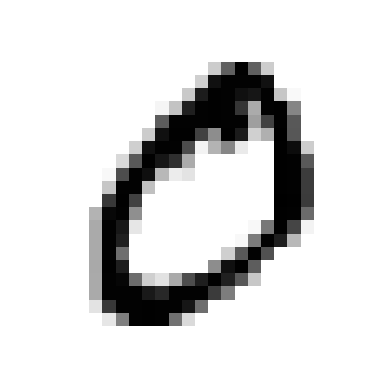

In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

def MNIST_HentDatasæt():
    # For at undertrykke parseradvarslen er parseren blevet brugt
    X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff', cache=False, as_frame=False)
    return X, y

# Formerer et billededata punkt (data) og ændrer formen fra 1D-array til 2D-array
def MNIST_PlotCiffer(data):
    billede = data.reshape(28, 28)
    # Farverne er sort og hvid
    plt.imshow(billede, cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

X, y = MNIST_HentDatasæt()

ciffer_at_plotte = X[1]  # For eksempel: X[0] for at vælge det anden ciffer i datasættet

# Eksempel på brug af funktionerne til at indlæse og plotte en enkelt ciffer
MNIST_PlotCiffer(ciffer_at_plotte)
plt.show()
# Denne kode indlæser et billede af cifferet "0" fra datasættet og bruger derefter matplotlib til at plotte cifferet på 
# skærmen med sort og hvid farve.


#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

X.shape=(70000, 784)


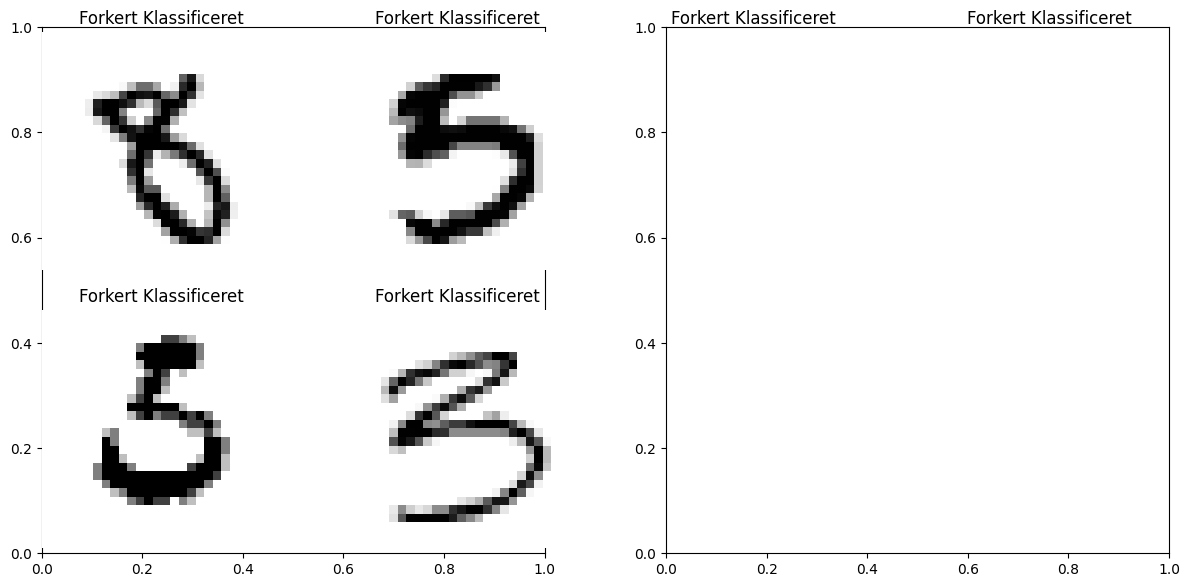

In [5]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = MNIST_HentDatasæt()

# train_test_split er blevet brugt til at opdele datasættet i trænings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if X.ndim == 3:
    print("Omformer X..")
    assert y.ndim == 1
    X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))
assert X.ndim == 2
print(f"X.shape={X.shape}")  # X.shape= (70000, 784)

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

# Laver forudsigelser på testdataene
y_pred = sgd_classifier.predict(X_test)

# Evaluer modelpræstation. Denne kode identificerer, hvilke prøver der blev korrekt klassificeret, og
# hvilke der blev klassificeret forkert baseret på de forudsigelser, som modellen lavede
korrekt_klassificerede_indekser = (y_pred == y_test_5)
korrekt_klassificerede_prøver = X_test[korrekt_klassificerede_indekser]
forkert_klassificerede_indekser = (y_pred != y_test_5)
forkert_klassificerede_prøver = X_test[forkert_klassificerede_indekser]

# Plott korrekt klassificerede prøver
plt.figure(figsize=(12, 6))

# Plott korrekt klassificerede prøver
plt.subplot(1, 2, 1)
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(korrekt_klassificerede_prøver[i].reshape(28, 28), cmap=plt.cm.binary)
    ax.set_title("Korrekt Klassificeret")
    ax.axis("off")

# Plott forkert klassificerede prøver
plt.subplot(1, 2, 2)
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(forkert_klassificerede_prøver[i].reshape(28, 28), cmap=plt.cm.binary)
    ax.set_title("Forkert Klassificeret")
    ax.axis("off")
    
plt.tight_layout()  # denne linje forhindrer overlapning af akser
plt.show()

# Advarselsteksten indikerer, at den nuværende måde, Matplotlib håndterer overlappende akser, er forældet. ax.remove() og 
# plt.tight_layout() er blevet brugt for at fjerne advarslen, men det ikke lykkes
# løst af robot (AI)

#### Qc Implement a dummy binary classifier

I denne opgave beskrives processen med at implementere en simpel binær klassifikator ved hjælp af en Python-klasse.

Scikit-learn-klassifikatorer arver normalt fra BaseEstimator (og eventuelt også ClassifierMixin), og de skal have funktionerne, fit og predict. Selvom det er almindeligt at arve fra BaseEstimator, kan man også implementere en klasse, der indeholder fit- og predict funktioner, uden nødvendigvis at arve fra den.

I nedenstående kode er en simpel DummyClassifier-klasse implementeret. Dens fit-metode gør intet, og predict-metoden forudsiger altid klassen 0. En instans af DummyClassifier oprettes, og fit kaldes med træningsdata, hvor y_train_5 bruges som input. Derefter forudsiger predict-metoden klassifikationerne for testdataene, og nøjagtigheden beregnes ved hjælp af accuracy_score-funktionen fra scikit-learn. Resultatet af accuracy scoren på 0.909 giver mening eftersom man forventer et ikke 5-tal 90% af gangene. DummyClassifier i bogen p.107 får en lignende score.

In [19]:
from sklearn.metrics import accuracy_score
import numpy as np

class DummyClassifier:
    def fit(self, X, y):
        # Ingenting behøver at blive trænet, da forudsigelsen altid er den samme
        pass

    def predict(self, X):
        # Forudsæt altid klasse 0
        return np.zeros((X.shape[0],), dtype=int)



# Opret en instans af DummyClassifier
dummy_classifier = DummyClassifier()

# Træn dummyklassificatoren på træningssættet
dummy_classifier.fit(X_train, y_train_5)

# Forudsig klassifikationerne for testdataene
y_pred_dummy = dummy_classifier.predict(X_test)

# Beregn nøjagtigheden
accuracy_dummy = accuracy_score(y_test_5, y_pred_dummy)

print("Dummy Classifier Accuracy:", accuracy_dummy)

# Opgave løst med chatGPT


Dummy Classifier Accuracy: 0.9090714285714285


### Qd Conclusion

I denne opgave har vi udforsket MNIST-datasettet, som indeholder billeder af håndskrevne cifre. Vi begyndte med at indlæse og forberede dataene. Dette omfattede opdeling af dataene i trænings- og testdatasæt, hvilket er afgørende for at evaluere vores model på uafhængige data.

Derefter kastede vi os ud i træningsprocessen ved at bruge SGD Classifier, til at skelne cifret "5" fra de øvrige cifre.

Til sidst skabte vi en Dummy Classifier, der altid gav den samme forudsigelse, nemlig "0". Denne havde en accuracy på over 0.9, hvilket lyder højt, men eftersom kun 10% af tallene er 5-taller giver dette mening. Dummyclassifieren gav os derfor et baseline-referencepunkt til vurdering af vores faktiske model.